# Tarea 2. Modelo de Regresion

### Contexto
Este conjunto de datos contiene detalles médicos de los pacientes, incluidas características como el nivel de glucosa, la presión arterial, el nivel de insulina, el IMC, la edad y más. La variable objetivo indica si un paciente tiene diabetes. El objetivo de este conjunto de datos es crear y evaluar varios modelos de aprendizaje automático o aprendizaje profundo para predecir la aparición de la diabetes.

### Contenido

Este archivo contiene los registros médicos de los pacientes, que incluyen diversas métricas relacionadas con la salud. El objetivo es utilizar estas características para predecir si un paciente tiene diabetes. A continuación, se incluye una descripción detallada de cada columna del conjunto de datos:

**Embarazos:** Número de veces que la paciente ha estado embarazada.


**Glucosa:** Concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia a la glucosa oral.


**Presión arterial:** Presión arterial diastólica (mm Hg).


**Grosor de la piel:** Grosor del pliegue cutáneo del tríceps (mm).


**Insulina:** Insulina sérica a las 2 horas (mu U/ml).


**IMC:** Índice de masa corporal (peso en kg/(altura en m)^2).


**DiabetesPedigreeFunction:** Función que puntúa la probabilidad de diabetes en función de los antecedentes familiares.


**Edad:** Edad de la paciente (años).


**Resultado:** Variable de clase (0 o 1), donde 1 representa la presencia de diabetes y 0 representa la ausencia de diabetes.

## Importar librerías y cargar la base de datos.

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np


# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf


# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

## Importar base de datos

In [2]:
df = pd.read_csv('base de datos diabetes.csv', header = 0, delimiter = ',')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Exploración de data

### Identificar valores nulos

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Ninguna variable contiene valores nulos.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Variable objetivo (Target)

Riesgo de ataque cardíaco:  presencia de riesgo de diabetes - 1: Sí, 0: No

In [8]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

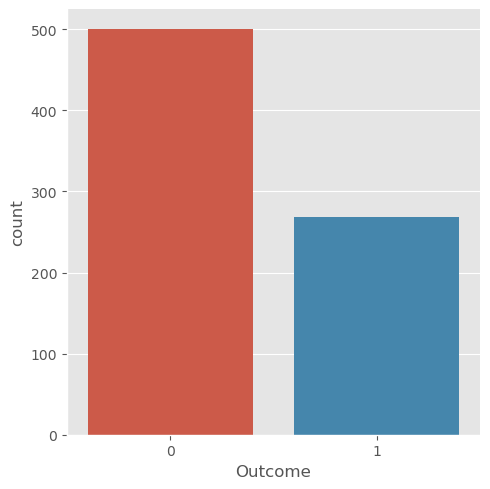

In [9]:
sns.catplot(x = 'Outcome', kind = "count", data = df)

## Variables Cuantitativas 

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Analizando las variables numericas Pregnancies, Glucose, BloodPressure, SkinThickness, BMI y Age no se evidencian outliers, ya que la media > std.

Donde podría haber outliers es en la variable Insulina ya que meadi < std.

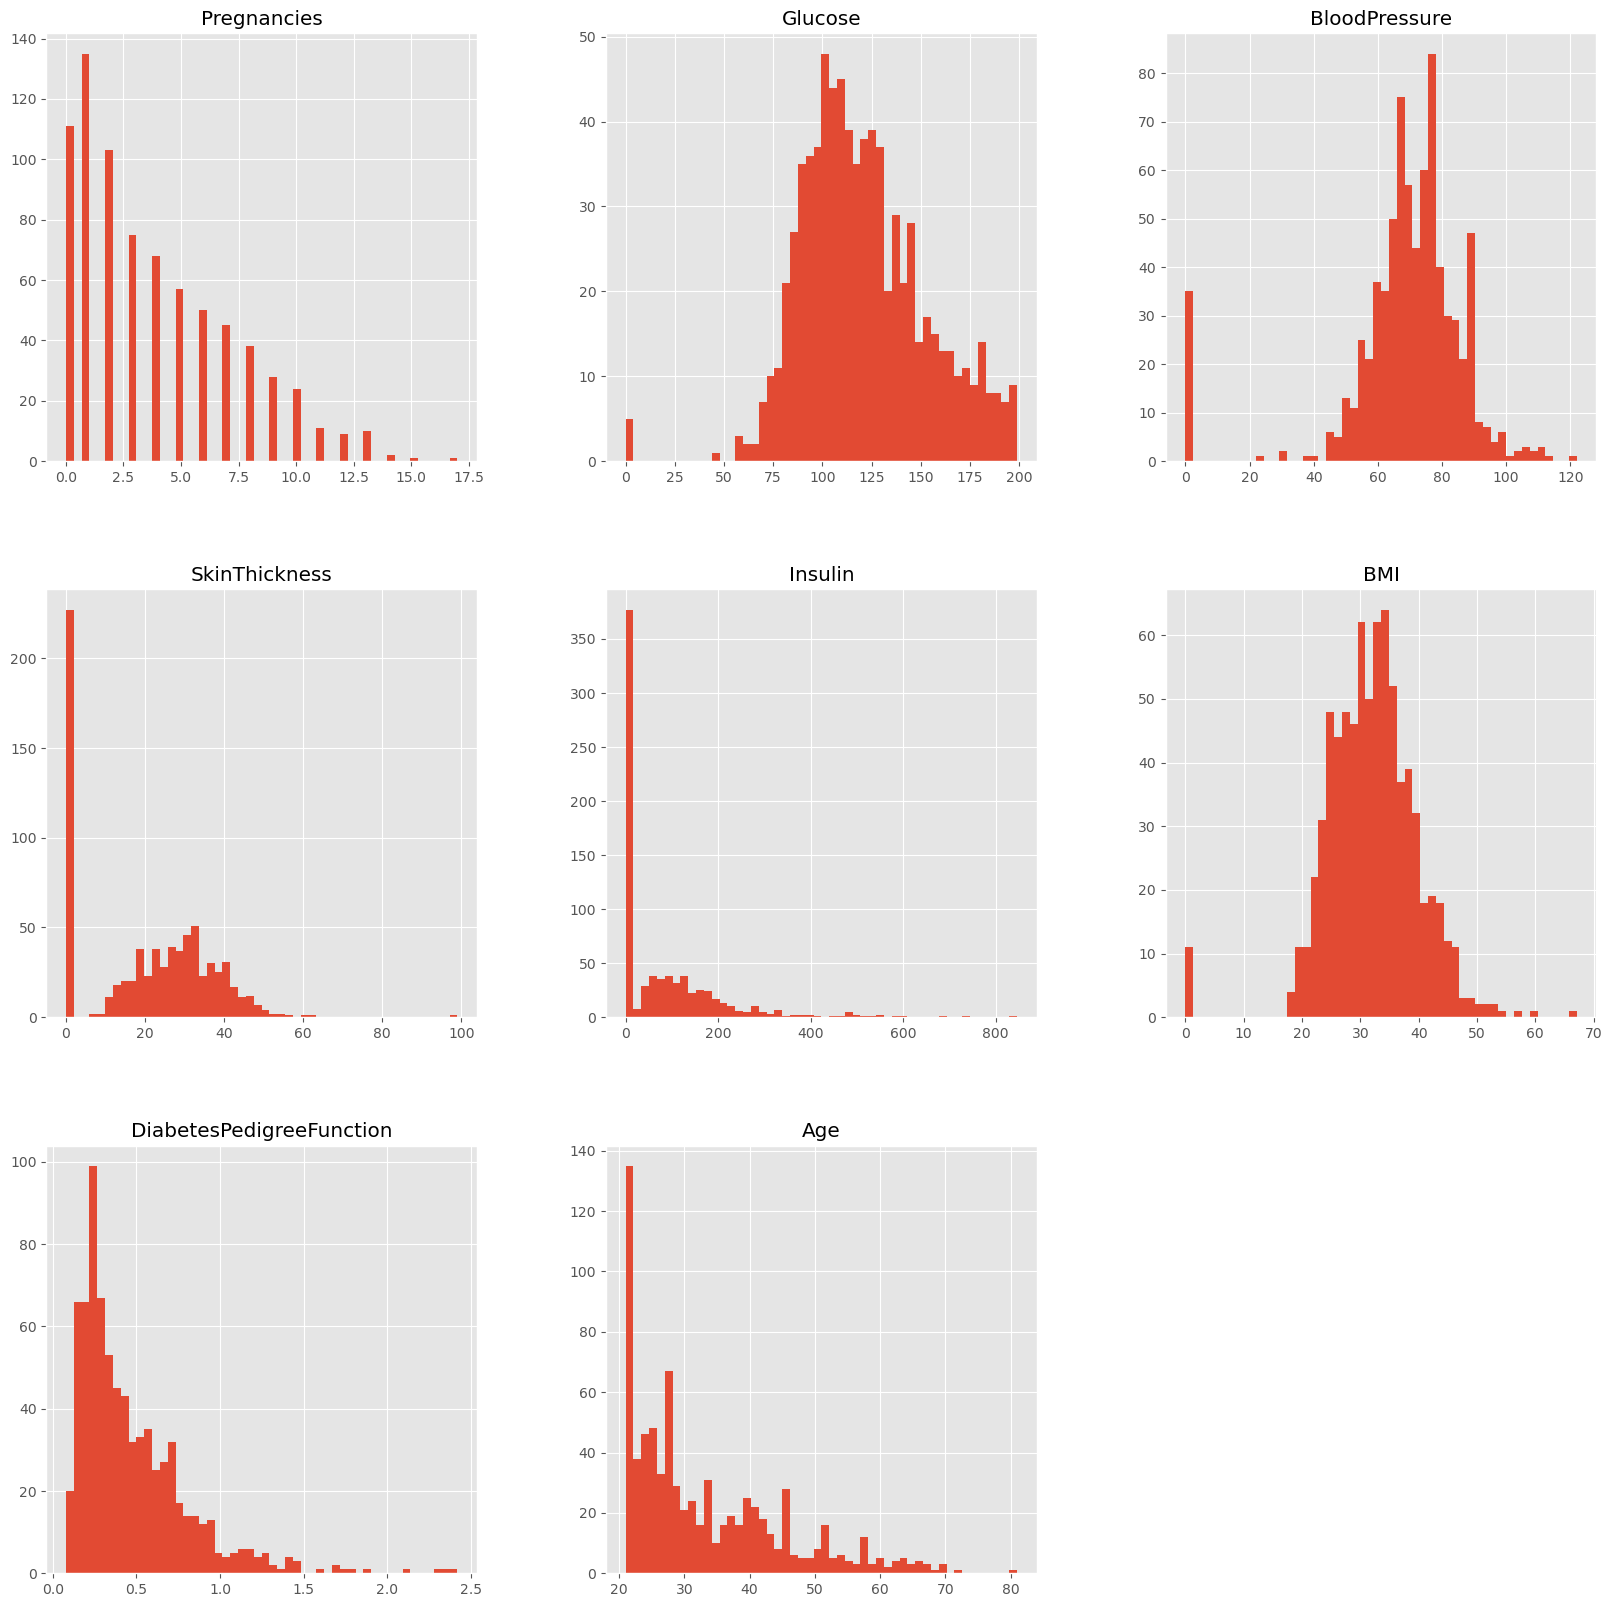

In [11]:
Var=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
     'DiabetesPedigreeFunction', 'Age']
df[Var].hist(bins=50 ,figsize=(20,20))
plt.show()

### Correlación de variables:

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
todas_las_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
     'DiabetesPedigreeFunction', 'Age', 'Outcome']

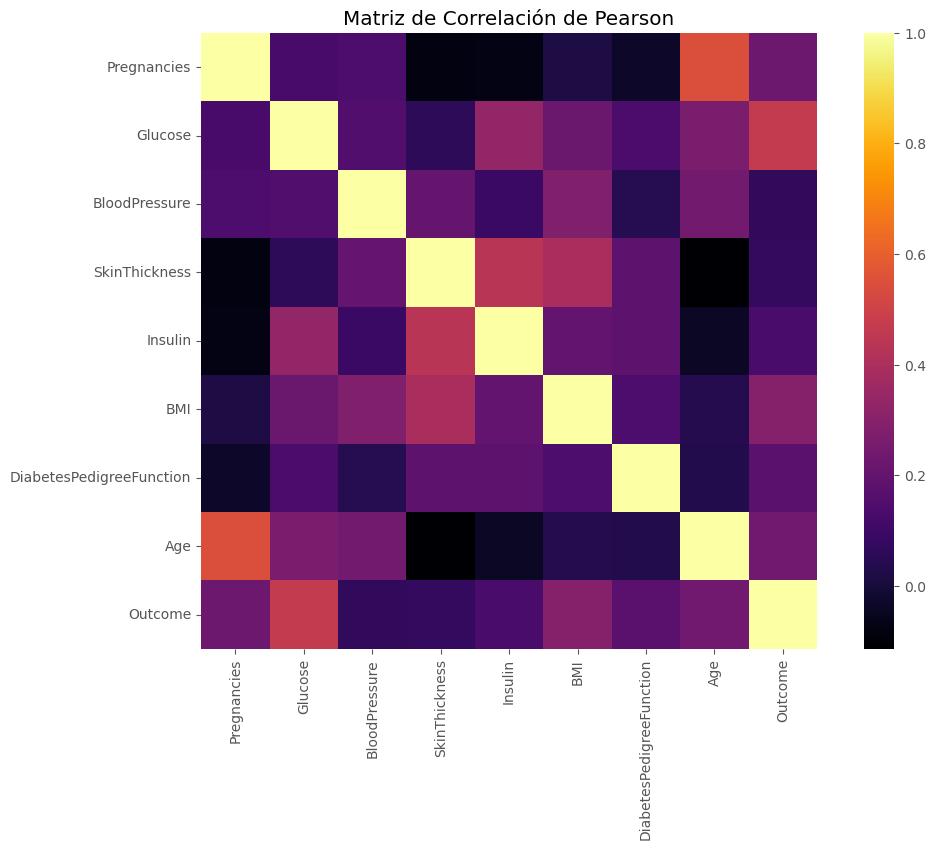

In [14]:
# Calcular la matriz de correlación de Pearson
corr = df[todas_las_variables].corr()

# Gráfico de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='inferno', square=True)
plt.title('Matriz de Correlación de Pearson')
plt.show()

In [15]:
print(df.corr()) 

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

Las variables con mayor relación entre ellas son Pregnancies y Age; Glucose y Outcome; SkinThickness y Insulin.

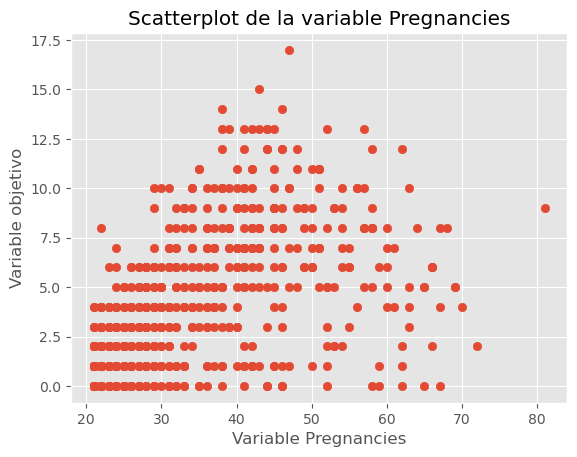

In [16]:
# Visualizar las observaciones 

plt.scatter(x = df['Age'], y=df['Pregnancies'])
plt.xlabel("Variable Pregnancies")
plt.ylabel("Variable objetivo")
plt.title("Scatterplot de la variable Pregnancies")
plt.show()

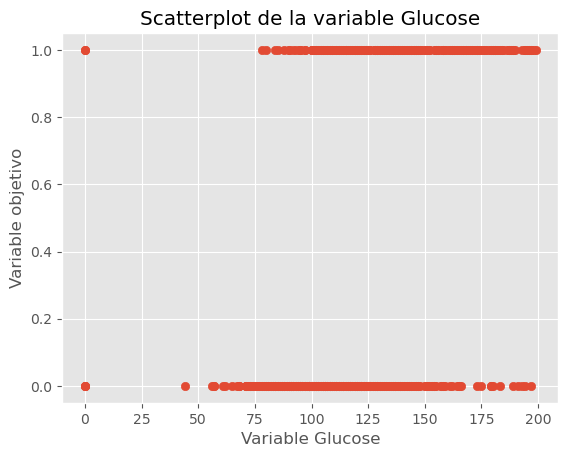

In [17]:
# Visualizar las observaciones 

plt.scatter(x = df['Glucose'], y=df['Outcome'])
plt.xlabel("Variable Glucose")
plt.ylabel("Variable objetivo")
plt.title("Scatterplot de la variable Glucose")
plt.show()

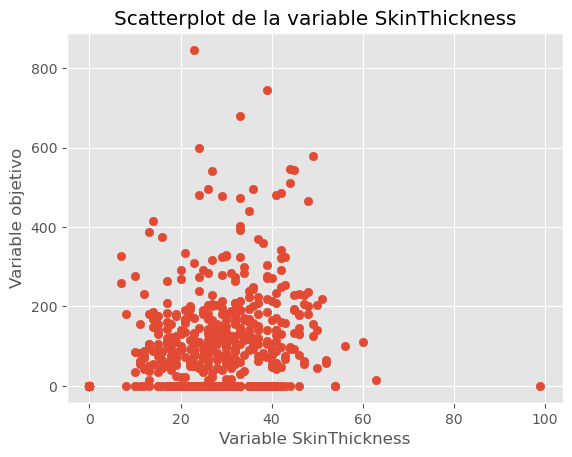

In [18]:
# Visualizar las observaciones 

plt.scatter(x = df['SkinThickness'], y=df['Insulin'])
plt.xlabel("Variable SkinThickness")
plt.ylabel("Variable objetivo")
plt.title("Scatterplot de la variable SkinThickness")
plt.show()

# Regresión lineal simple: Edad y Embarazos

## Representación gráfica

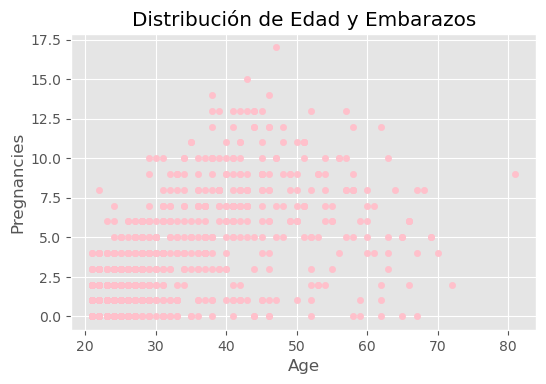

In [19]:
# Gráfico

fig, ax = plt.subplots(figsize=(6, 3.84))

df.plot(
    x    = 'Age',
    y    = 'Pregnancies',
    c    = 'pink',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de Edad y Embarazos');

In [20]:
# Correlación lineal entre las dos variables

corr_test = pearsonr(x = df['Age'], y =  df['Pregnancies'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.5443412284023387
P-value:  1.8628128328639617e-60


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.54) y significativa (p-value casi 0). 

## Ajuste del modelo

In [21]:
# División de los datos en train y test

X = df[['Age']]
y = df['Pregnancies']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

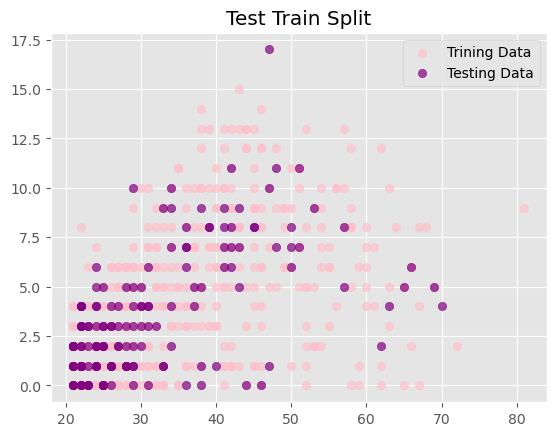

In [22]:
# Test train split visualization

plt.scatter(X_train, y_train, label='Trining Data', color='pink', alpha=.7)
plt.scatter(X_test, y_test, label='Testing Data', color='purple', alpha=.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [23]:
# Creación del modelo

modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [24]:
# Información del modelo

print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-1.34435571]
Coeficiente: [('Age', 0.15653818991019333)]
Coeficiente de determinación R^2: 0.2962859554820917


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [25]:
# Error de test del modelo 

predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[1.94294628]
 [2.72563723]
 [3.97794275]]

El error (rmse) de test es: 2.6257582546213345


Cuanto menor sea el RMSE, mejor será el modelo y sus predicciones.

## Predicciones

<function matplotlib.pyplot.show(close=None, block=None)>

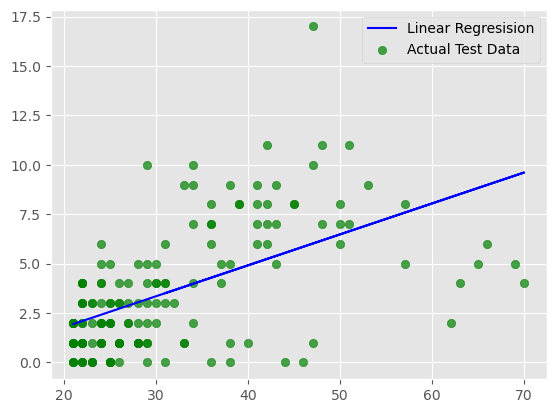

In [26]:
prediction = modelo.predict(X_test.reshape(-1,1))

# Grafica linea de predicción vs data test

plt.plot(X_test, prediction, label='Linear Regresision', color='blue')
plt.scatter(X_test, y_test, label='Actual Test Data', color='green', alpha=.7)
plt.legend()
plt.show

In [27]:
# Predecir 
modelo.predict(np.array([[28]]))[0]

array([3.03871361])

In [28]:
# Score del modelo 
modelo.score(X_test.reshape(-1,1), y_test)

0.29908701519530334

La columna (coef) devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal que equivalen a la ordenada en el origen (intercept o const) y a la pendiente. Se muestran también los errores estándar, el valor del estadístico t y el p-value (dos colas) de cada uno de los dos parámetros. Esto permite determinar si los predictores son significativamente distintos de 0, es decir, que tienen importancia en el modelo. Para el modelo generado, tanto la ordenada en el origen como la pendiente son significativas (p-values < 0.05).

El valor de R-squared indica que el modelo es capaz de explicar el 30% de la variabilidad observada en la variable respuesta. 

El modelo lineal generado sigue la ecuación:

Pregnancies = -1.3444 + 0.1565 age


El error de test del modelo es de 2.63, es decir, las predicciones del modelo final se alejan en promedio 2.63 unidades del valor real.

# Regresión lineal simple: Edad y Embarazos

## Representación gráfica

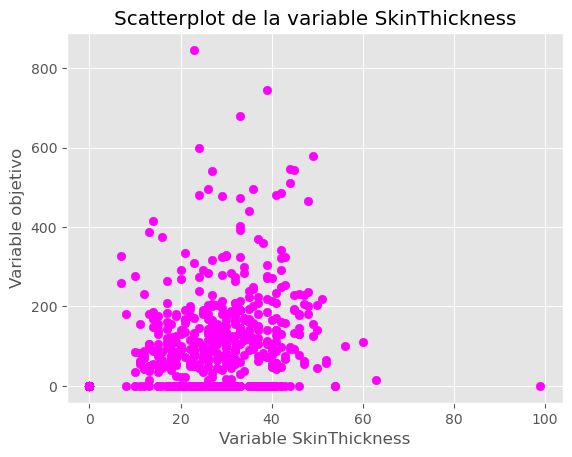

In [29]:
plt.scatter(x = df['SkinThickness'], y=df['Insulin'], color='magenta')
plt.xlabel("Variable SkinThickness")
plt.ylabel("Variable objetivo")
plt.title("Scatterplot de la variable SkinThickness")
plt.show()

In [30]:
# Correlación lineal entre las dos variables

corr_test_2 = pearsonr(x = df['SkinThickness'], y =  df['Insulin'])
print("Coeficiente de correlación de Pearson: ", corr_test_2[0])
print("P-value: ", corr_test_2[1])

Coeficiente de correlación de Pearson:  0.43678257012001387
P-value:  4.043577432052538e-37


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.44) y significativa (p-value casi 0). 

## División de los datos

In [31]:
# División de los datos en train y test

X = df[['SkinThickness']]
y = df['Insulin']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

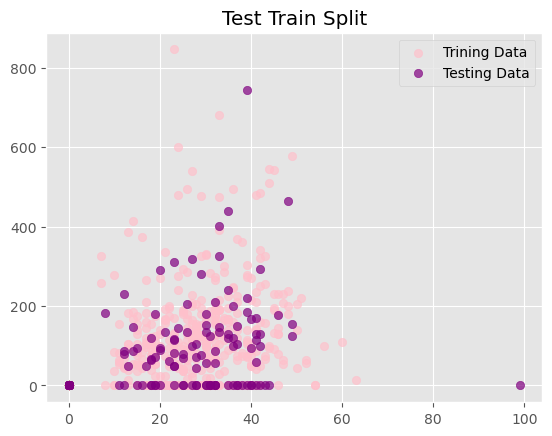

In [32]:
# Test train split visualization

plt.scatter(X_train, y_train, label='Trining Data', color='pink', alpha=.7)
plt.scatter(X_test, y_test, label='Testing Data', color='purple', alpha=.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [33]:
# Creación del modelo

modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [34]:
# Información del modelo

print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [13.89490532]
Coeficiente: [('SkinThickness', 3.303899498438914)]
Coeficiente de determinación R^2: 0.19007136928555124


In [35]:
# Error de test del modelo 

predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[66.7572973 ]
 [96.49239278]
 [13.89490532]]

El error (rmse) de test es: 102.35583314635461


## Predicciones

<function matplotlib.pyplot.show(close=None, block=None)>

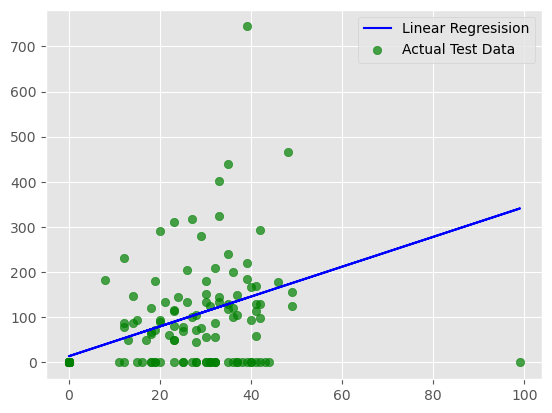

In [36]:
prediction = modelo.predict(X_test.reshape(-1,1))

# Grafica linea de predicción vs data test

plt.plot(X_test, prediction, label='Linear Regresision', color='blue')
plt.scatter(X_test, y_test, label='Actual Test Data', color='green', alpha=.7)
plt.legend()
plt.show

In [37]:
# Score del modelo 
modelo.score(X_test.reshape(-1,1), y_test)

0.14299266141914946

# Dataset Preparation (splitting and normalization)

In [38]:
dfTrain = df[:650]
dfTest = df[650:750]
dfCheck = df[750:]

In [39]:
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop(['Outcome'], axis=1))

In [40]:
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop(['Outcome'], axis=1))

In [41]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds


## Training and Evaluating Machine Learning Model

In [42]:
from sklearn.linear_model import LogisticRegression

diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression()

In [43]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


## Interpreting the ML Model

In [44]:
trainData_2 = (dfTrain.drop(['Outcome'], axis=1))

Text(0.5, 0, 'Importance')

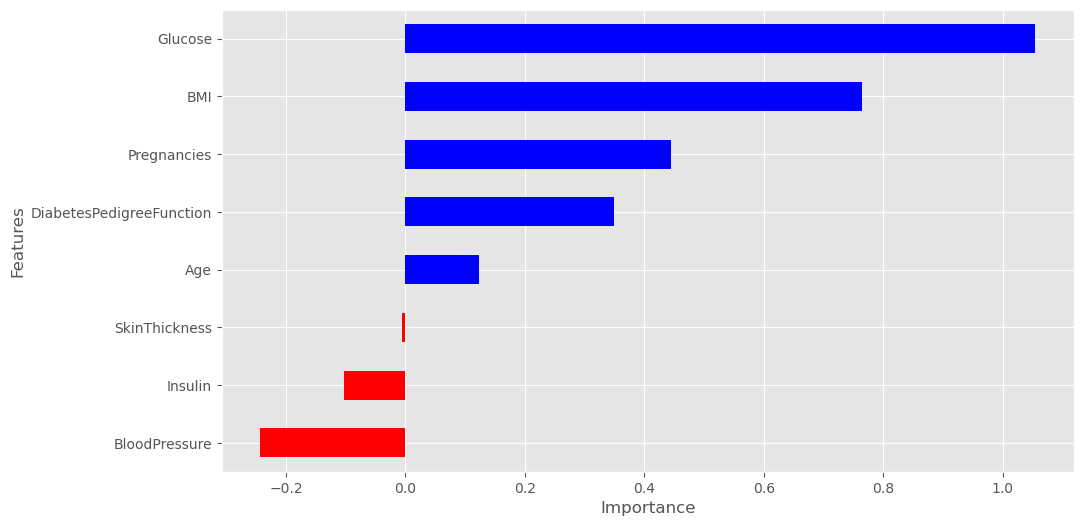

In [45]:
coeff = list(diabetesCheck.coef_[0])
labels = list(trainData_2.columns)

features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

De la figura anterior podemos extraer las siguientes conclusiones:

- El nivel de glucosa, el IMC, los embarazos y la función de pedigrí de la diabetes tienen una influencia significativa en el modelo, especialmente el nivel de glucosa y el IMC.


- La presión arterial tiene una influencia negativa en la predicción, es decir, una presión arterial más alta se correlaciona con que una persona no sea diabética. 


In [46]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [47]:
import joblib

joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

In [48]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  78.0 %


## Making Predictions with the model

In [49]:
print(dfCheck.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
750            4      136             70              0        0  31.2   
751            1      121             78             39       74  39.0   
752            3      108             62             24        0  26.0   
753            0      181             88             44      510  43.3   
754            8      154             78             32        0  32.4   

     DiabetesPedigreeFunction  Age  Outcome  
750                     1.182   22        1  
751                     0.261   28        0  
752                     0.223   25        0  
753                     0.222   26        1  
754                     0.443   45        1  


In [50]:
sampleData = dfCheck[:1]

# prepare sample
sampleDataFeatures = np.asarray(sampleData.drop(['Outcome'], axis=1))
sampleDataFeatures = (sampleDataFeatures - means)/stds

# predict
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.44077634 0.55922366]]
prediction: [1]


El primer elemento de la matriz predictionProbability = 0.44 es la probabilidad de que la clase sea 0 y el segundo elemento 0.56 es la probabilidad de que la clase sea 1. Las probabilidades suman 1. 

Como podemos ver que la clase más probable es 1 , obtenemos [1] como nuestra predicción, lo que significa que el modelo predice que la persona tiene diabetes.

# Arbol de Decisión 

In [51]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [52]:
# Seleccionaremos un 20% de los datos para estudiar el beneficio de las estategias de muestreo

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
     'DiabetesPedigreeFunction', 'Age']]
y = df[['Outcome']]

import sklearn.model_selection as model_selection
               
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    train_size=0.8,
                                                                    test_size=0.2, 
                                                                    random_state=101)

In [53]:
df_train = pd.concat([X_train,y_train],axis=1)

In [54]:
df_train.shape

(614, 9)

In [55]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier() 

In [56]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
# GENERAR LA PREDICCIÓN
y_pred = model.predict(X_test)

In [58]:
# EVALUAR CON LAS MÉTRICAS REFERENCIALES
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

Accuracy DATOS ORIGINALES: 66.88%


In [59]:
from sklearn.metrics import accuracy_score, log_loss

ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Log Loss: 11.936534563928406


Donde el Log loss representa el logaritmo de la cantidad de errores del modelo.

AHORA VEAMOS LA MATRIZ DE CONFUSION: Para analizar mas afondo como ha trabajado el modelo con los datos reales.

Matriz de Confusión - DATOS ORIGINALES:
 [[77 26]
 [25 26]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       103
           1       0.50      0.51      0.50        51

    accuracy                           0.67       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.67      0.67      0.67       154



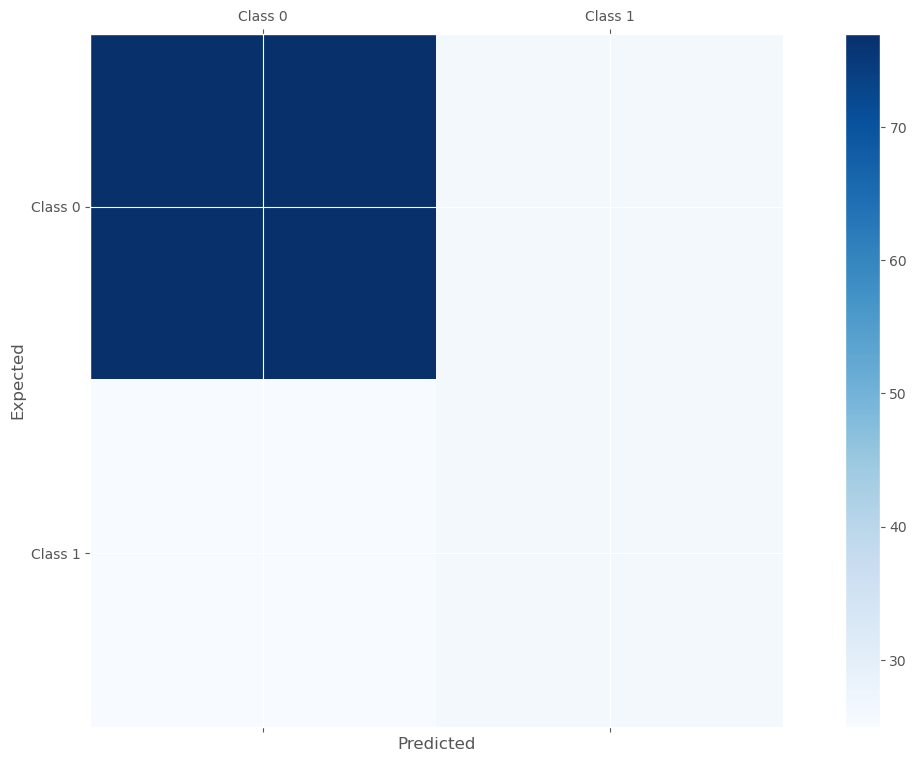

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt


#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Bibliografía.

Diabetes dataset. (2024). [Data set]. https://www.kaggle.com/datasets/lara311/diabetes-dataset-using-many-medical-metrics/data![image.png](attachment:image.png)